# Project 2: Supervised Learning
### Building a Student Intervention System

## 1. Classification vs Regression

Your goal is to identify students who might need early intervention - which type of supervised machine learning problem is this, classification or regression? Why?

## 2. Exploring the Data

Let's go ahead and read in the student dataset first.

_To execute a code cell, click inside it and press **Shift+Enter**._

In [1]:
# Import libraries
import numpy as np
import pandas as pd
from sklearn.cross_validation import train_test_split

In [2]:
# Read student data
student_data = pd.read_csv("student-data.csv")
print("Student data read successfully!")
# Note: The last column 'passed' is the target/label, all other are feature columns

Student data read successfully!


Now, can you find out the following facts about the dataset?
- Total number of students
- Number of students who passed
- Number of students who failed
- Graduation rate of the class (%)
- Number of features

_Use the code block below to compute these values. Instructions/steps are marked using **TODO**s._

In [3]:
n_students = np.shape(student_data)[0]
n_features = np.shape(student_data)[1]
n_passed = len(student_data[student_data.passed=='yes'])
n_failed = len(student_data[student_data.passed=='no'])
grad_rate = (n_passed/n_students)*100
print("Total number of students: {}".format(n_students))
print("Number of students who passed: {}".format(n_passed))
print("Number of students who failed: {}".format(n_failed))
print("Number of features: {}".format(n_features))
print("Graduation rate of the class: {:.2f}%".format(grad_rate))

Total number of students: 395
Number of students who passed: 265
Number of students who failed: 130
Number of features: 31
Graduation rate of the class: 67.09%


## 3. Preparing the Data
In this section, we will prepare the data for modeling, training and testing.

### Identify feature and target columns
It is often the case that the data you obtain contains non-numeric features. This can be a problem, as most machine learning algorithms expect numeric data to perform computations with.

Let's first separate our data into feature and target columns, and see if any features are non-numeric.<br/>
**Note**: For this dataset, the last column (`'passed'`) is the target or label we are trying to predict.

In [4]:
# Extract feature (X) and target (y) columns
feature_cols = list(student_data.columns[:-1])  # all columns but last are features
target_col = student_data.columns[-1]  # last column is the target/label
print("Feature column(s):-\n{}".format(feature_cols))
print("Target column: {}".format(target_col))

X_all = student_data[feature_cols]  # feature values for all students
y_all = student_data[target_col]  # corresponding targets/labels
print("\nFeature values:-")
print(X_all.head())  # print the first 5 rows

Feature column(s):-
['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences']
Target column: passed

Feature values:-
  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher   
1     GP   F   17       U     GT3       T     1     1  at_home     other   
2     GP   F   15       U     LE3       T     1     1  at_home     other   
3     GP   F   15       U     GT3       T     4     2   health  services   
4     GP   F   16       U     GT3       T     3     3    other     other   

    ...    higher internet  romantic  famrel  freetime goout Dalc Walc health  \
0   ...       yes       no        no       4         3     4    1    1      3   
1   ...    

### Preprocess feature columns

As you can see, there are several non-numeric columns that need to be converted! Many of them are simply `yes`/`no`, e.g. `internet`. These can be reasonably converted into `1`/`0` (binary) values.

Other columns, like `Mjob` and `Fjob`, have more than two values, and are known as _categorical variables_. The recommended way to handle such a column is to create as many columns as possible values (e.g. `Fjob_teacher`, `Fjob_other`, `Fjob_services`, etc.), and assign a `1` to one of them and `0` to all others.

These generated columns are sometimes called _dummy variables_, and we will use the [`pandas.get_dummies()`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html?highlight=get_dummies#pandas.get_dummies) function to perform this transformation.

In [5]:
# Preprocess feature columns
def preprocess_features(X):
    outX = pd.DataFrame(index=X.index)  # output dataframe, initially empty

    # Check each column
    for col, col_data in X.iteritems():
        # If data type is non-numeric, try to replace all yes/no values with 1/0
        if col_data.dtype == object:
            col_data = col_data.replace(['yes', 'no'], [1, 0])
        # Note: This should change the data type for yes/no columns to int

        # Normalize numeric fields
        if col_data.dtype == 'int64' or col_data.dtype == float:
            mmin = col_data.min()
            mmax = col_data.max()
            col_data = col_data.apply(lambda x: (x - mmin) / (mmax - mmin))
        
        # If still non-numeric, convert to one or more dummy variables
        if col_data.dtype == object:
            col_data = pd.get_dummies(col_data, prefix=col)  # e.g. 'school' => 'school_GP', 'school_MS'
            
        outX = outX.join(col_data)  # collect column(s) in output dataframe

    return outX

X_all = preprocess_features(X_all)
Y_all = student_data['passed'].replace(['yes', 'no'], [1, 0])
print("Processed feature columns ({}):-\n{}".format(len(X_all.columns), list(X_all.columns)))

Processed feature columns (48):-
['school_GP', 'school_MS', 'sex_F', 'sex_M', 'age', 'address_R', 'address_U', 'famsize_GT3', 'famsize_LE3', 'Pstatus_A', 'Pstatus_T', 'Medu', 'Fedu', 'Mjob_at_home', 'Mjob_health', 'Mjob_other', 'Mjob_services', 'Mjob_teacher', 'Fjob_at_home', 'Fjob_health', 'Fjob_other', 'Fjob_services', 'Fjob_teacher', 'reason_course', 'reason_home', 'reason_other', 'reason_reputation', 'guardian_father', 'guardian_mother', 'guardian_other', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences']


### Split data into training and test sets

So far, we have converted all _categorical_ features into numeric values. In this next step, we split the data (both features and corresponding labels) into training and test sets.

In [6]:
# First, decide how many training vs test samples you want
num_all = student_data.shape[0]  # same as len(student_data)
num_train = 300  # about 75% of the data
num_test = num_all - num_train

# TODO: Then, select features (X) and corresponding labels (y) for the training and test sets
# Note: Shuffle the data or randomly select samples to avoid any bias due to ordering in the dataset

x_train, x_test, y_train, y_test = train_test_split(X_all, Y_all, test_size=num_test, random_state=42)

print("Training set: {} samples".format(x_train.shape[0]))
print("Test set: {} samples".format(x_test.shape[0]))
# Note: If you need a validation set, extract it from within training data

# Helper function for iterative testing later:
def makeSamples(trainSize):
    if trainSize == x_train.shape[0]:
        return(x_train, y_train)
    else:
        sizedX, discX, sizedY, discY = train_test_split(x_train, y_train, test_size=trainSize, random_state=42)
        return(sizedX, sizedY)

Training set: 300 samples
Test set: 95 samples


## 4. Training and Evaluating Models
Choose 3 supervised learning models that are available in scikit-learn, and appropriate for this problem. For each model:

- What is the theoretical O(n) time & space complexity in terms of input size?
- What are the general applications of this model? What are its strengths and weaknesses?
- Given what you know about the data so far, why did you choose this model to apply?
- Fit this model to the training data, try to predict labels (for both training and test sets), and measure the F<sub>1</sub> score. Repeat this process with different training set sizes (100, 200, 300), keeping test set constant.

Produce a table showing training time, prediction time, F<sub>1</sub> score on training set and F<sub>1</sub> score on test set, for each training set size.

Note: You need to produce 3 such tables - one for each model.

In [7]:
# Train a model
import time

def train_classifier(clf, X_train, y_train):
    start = time.time()
    clf.fit(X_train, y_train)
    end = time.time()
    return('Training Time','{:.3f}'.format(end - start))

# TODO: Choose a model, import it and instantiate an object
from sklearn import tree
clf = tree.DecisionTreeClassifier()

# Fit model to training data

train_classifier(clf, x_train, y_train)  # note: using entire training set here
#print(clf)  # you can inspect the learned model by printing it

('Training Time', '0.002')

In [8]:
# Predict on training set and compute F1 score
from sklearn.metrics import f1_score

def predict_labels(clf, features, target):
    start = time.time()
    y_pred = clf.predict(features)
    end = time.time()
    return(f1_score(target.values, y_pred), "{:.3f}".format(end - start))

train_f1_score = predict_labels(clf, x_train, y_train)
print("F1 score for training set: {}".format(train_f1_score))

F1 score for training set: (1.0, '0.001')


In [9]:
# Predict on test data
print("F1 score for test set: {}".format(predict_labels(clf, x_test, y_test)))

F1 score for test set: (0.63934426229508201, '0.000')


### 4. a -  Decision Tree Classifier
- What is the theoretical O(n) time & space complexity in terms of input size?

According to the scikit-learn reference material, the O(n) time expense for training a tree is O(n²*f*log(n)) where n is the number of samples and f is the number of features. There are alternative implimentations in scikit-learn that can be more efficient in some circumstances.

The greatest impact comes from the number of training examples which has a logarithmic effect on the time growth. There is also a linear effect from the number of features (since each node needs to iterate each feature). From what I can see the memory cost should be a constant n plus a small overhead for the nodes as they are computed, there should be no need to copy the training set as subsets can be used through training.

Query time is estimated to be O(log(n)).

- What are the general applications of this model? What are its strengths and weaknesses?

Decision trees have a few advantages over other models in that they can handle much less processed data (they can work with categorical values instead of needing dummies) and when not overly complex can create easily understood (white-box) models. 

Their downsides are they can tend towards overfitting if given too many features or not structured correctly in training. They can also be biased if the training classes are too uneven and can become computationally expensive in training with too many inputs or features. 

- Given what you know about the data so far, why did you choose this model to apply?

 Our data is limited in both the number of features and observations and has already been cleaned more than neccesary for a decision tree so it is a good fit to test with. The added bonus of the model being easily visualized and explained could also prove useful in getting the board's buy in if it is the chosen model. 

- Fit this model to the training data, try to predict labels (for both training and test sets), and measure the F<sub>1</sub> score. Repeat this process with different training set sizes (100, 200, 300), keeping test set constant.

In [10]:
from sklearn import tree

resultTable = {}
sizes = [100,200,300]

# Train and predict using different training set sizes
def train_predict(clf, x_train, y_train, x_test, y_test):
    mdl = clf.__class__.__name__ + '_' +  str(len(x_train))
    if mdl not in resultTable:
        resultTable[mdl] = {}
    resultTable[mdl]['Training Size'] = len(x_train)
    resultTable[mdl]['Train Time'] = train_classifier(clf, x_train, y_train)[1]
    pred = predict_labels(clf, x_train, y_train)
    resultTable[mdl]['Training F1'] = pred[0]
    resultTable[mdl]['Train Pred Time'] = pred[1]
    test = predict_labels(clf, x_test, y_test)
    resultTable[mdl]['Test F1'] = test[0]
    resultTable[mdl]['Test Pred Time'] = test[1]

clf = tree.DecisionTreeClassifier(max_depth=5)

for s in sizes:
    tX, tY = makeSamples(s)
    train_predict(clf, tX, tY, x_test, y_test)

pd.DataFrame.from_dict(resultTable).T[['Training Size','Train Time','Training F1','Train Pred Time','Test Pred Time','Test F1']]

,Training Size,Train Time,Training F1,Train Pred Time,Test Pred Time,Test F1
DecisionTreeClassifier_100,100,0.001,0.938776,0.000,0.000,0.817518
DecisionTreeClassifier_200,200,0.001,0.922559,0.001,0.000,0.788732
DecisionTreeClassifier_300,300,0.002,0.871194,0.000,0.000,0.746269


### 4. b -  K Nearest Neighbors 
- What is the theoretical O(n) time & space complexity in terms of input size?

From our lecture, k Nearest Neighbors tends to have a very low training cost of O(1) in terms of time since it simple loads the data to the model. The memory cost is linear with the size of the training sample or O(n). The trade-off is that the query time is higher since the model needs to find the appropriate point and identify the appropriate points with an O(log(n) + k) although the memory remains constant.

- What are the general applications of this model? What are its strengths and weaknesses?

The model is different than Decision Trees since it is instance based and doesn't try and produce a model of the data (instead just polling k training data points that are nearest the queried point to see which class they fit into). Since there is no underlying model, this means that KNN can better represent iregular decision boundaries (since there is no need for a very complex equation to have been modeled) but this is a two edged sword since outliers can skew the boundary or create an area of false positives behing the primary boundary.

- Given what you know about the data so far, why did you choose this model to apply?

Scikit's documentation indicates that KNN has been applied in a large number of situations succesfully where other models may have difficulty approximating a function to model the data.

- Fit this model to the training data, try to predict labels (for both training and test sets), and measure the F<sub>1</sub> score. Repeat this process with different training set sizes (100, 200, 300), keeping test set constant.



In [11]:
# Add another model, let's use a KNN
from sklearn import neighbors 

resultTable2 = {}

# Train and predict using different training set sizes
def train_predict(clf, x_train, y_train, x_test, y_test):
    mdl = clf.__class__.__name__ + '_' +  str(len(x_train))
    if mdl not in resultTable2:
        resultTable2[mdl] = {}
    resultTable2[mdl]['Training Size'] = len(x_train)
    resultTable2[mdl]['Train Time'] = train_classifier(clf, x_train, y_train)[1]
    pred = predict_labels(clf, x_train, y_train)
    resultTable2[mdl]['Training F1'] = pred[0]
    resultTable2[mdl]['Train Pred Time'] = pred[1]
    test = predict_labels(clf, x_test, y_test)
    resultTable2[mdl]['Test F1'] = test[0]
    resultTable2[mdl]['Test Pred Time'] = test[1]

clf = neighbors.KNeighborsClassifier()
#params = {'KNeighborsClassifier':{'n_neighbors':5,'algorithm':'brute'}}

for s in sizes:
    tX, tY = makeSamples(s)
    train_predict(clf, tX, tY, x_test, y_test)

pd.DataFrame.from_dict(resultTable2).T[['Training Size','Train Time','Training F1','Train Pred Time','Test Pred Time','Test F1']]

,Training Size,Train Time,Training F1,Train Pred Time,Test Pred Time,Test F1
KNeighborsClassifier_100,100,0.016,0.839506,0.000,0.000,0.75
KNeighborsClassifier_200,200,0.000,0.843137,0.000,0.000,0.751773
KNeighborsClassifier_300,300,0.000,0.824561,0.000,0.016,0.731343


### 4. c -  Linear SVC
- What is the theoretical O(n) time & space complexity in terms of input size?

According to scikit-learns documentation, the computational complexity of their implementation is between O(f x n²) and O(f x n³) depending on the dataset. The choice of kernel could also influence the computational cost of creating the hyperplane. The query cost should be constant since the query is simply being checked against the hyperplane.  

- What are the general applications of this model? What are its strengths and weaknesses?

Since the model creates a hyperplane that optimizes the seperation space between the labeled groups, the groups need to be seperable in a feature plane (although it doesn't need to be linear depending on the kernel.) 

The model is sensitive to scaled features and so it's important when optimizing to pre-scale them where there is a lot of variation (if one feature is price of a home while another is the square footage, the price would likely have a disproportionate effect since it's on a larger scale. 

- Given what you know about the data so far, why did you choose this model to apply?

The model works by finding the best dividing plane between the classes and since we are trying to find a dividing plane between the features to predict which students are in danger of failing, its worth exploring the model.

- Fit this model to the training data, try to predict labels (for both training and test sets), and measure the F<sub>1</sub> score. Repeat this process with different training set sizes (100, 200, 300), keeping test set constant.


In [12]:
# Add another model, let's use a KNN
from sklearn import svm 

resultTable3 = {}

# Train and predict using different training set sizes
def train_predict(clf, x_train, y_train, x_test, y_test):
    mdl = clf.__class__.__name__ + '_' +  str(len(x_train))
    if mdl not in resultTable3:
        resultTable3[mdl] = {}
    resultTable3[mdl]['Training Size'] = len(x_train)
    resultTable3[mdl]['Train Time'] = train_classifier(clf, x_train, y_train)[1]
    pred = predict_labels(clf, x_train, y_train)
    resultTable3[mdl]['Training F1'] = pred[0]
    resultTable3[mdl]['Train Pred Time'] = pred[1]
    test = predict_labels(clf, x_test, y_test)
    resultTable3[mdl]['Test F1'] = test[0]
    resultTable3[mdl]['Test Pred Time'] = test[1]

clf = svm.SVC()
for s in sizes:
    tX, tY = makeSamples(s)
    train_predict(clf, tX, tY, x_test, y_test)

pd.DataFrame.from_dict(resultTable3).T[['Training Size','Train Time','Training F1','Train Pred Time','Test Pred Time','Test F1']]

,Training Size,Train Time,Training F1,Train Pred Time,Test Pred Time,Test F1
SVC_100,100,0.000,0.837209,0.000,0.000,0.774194
SVC_200,200,0.000,0.820059,0.000,0.000,0.774194
SVC_300,300,0.016,0.811881,0.000,0.000,0.774194


## 5. Choosing the Best Model

- Based on the experiments you performed earlier, in 1-2 paragraphs explain to the board of supervisors what single model you chose as the best model. Which model is generally the most appropriate based on the available data, limited resources, cost, and performance?
- In 1-2 paragraphs explain to the board of supervisors in layman's terms how the final model chosen is supposed to work (for example if you chose a Decision Tree or Support Vector Machine, how does it make a prediction).
- Fine-tune the model. Use Gridsearch with at least one important parameter tuned and with at least 3 settings. Use the entire training set for this.
- What is the model's final F<sub>1</sub> score?

In [13]:
pd.concat([pd.DataFrame.from_dict(resultTable).T, pd.DataFrame.from_dict(resultTable2).T, pd.DataFrame.from_dict(resultTable3).T])[['Training Size','Train Time','Training F1','Train Pred Time','Test Pred Time','Test F1']]

,Training Size,Train Time,Training F1,Train Pred Time,Test Pred Time,Test F1
DecisionTreeClassifier_100,100,0.001,0.938776,0.000,0.000,0.817518
DecisionTreeClassifier_200,200,0.001,0.922559,0.001,0.000,0.788732
DecisionTreeClassifier_300,300,0.002,0.871194,0.000,0.000,0.746269
KNeighborsClassifier_100,100,0.016,0.839506,0.000,0.000,0.75
KNeighborsClassifier_200,200,0.000,0.843137,0.000,0.000,0.751773
KNeighborsClassifier_300,300,0.000,0.824561,0.000,0.016,0.731343
SVC_100,100,0.000,0.837209,0.000,0.000,0.774194
SVC_200,200,0.000,0.820059,0.000,0.000,0.774194
SVC_300,300,0.016,0.811881,0.000,0.000,0.774194


### Board Report

The final model selected was a Decision Tree. It had the optimum F1 score in testing (beating both the KNN and SVM models at all training size levels). The decision tree was average in training time but then the fastest in terms of predictions and creates a small model in memory terms. All models had overall excellent prediction performance on even consumer level hardware with none approaching a 1 second run time but the Decision Tree was slightly faster.

A Decision Tree works by splitting the dataset based on the feature with the highest ability to differentiate between students who are at risk vs. not and splitting the data on that criteria. It then repeats the exercise until it has created a tree of sufficient complexity to differentiate the sample population with an acceptable level of accuracy. As an example, the first split of our tree (illustrated below) is based on if the student's normalized fail rate is above 50%. The students above this mark are then processed seperatly from those who were below.

As these treatment rules are built, the tree eventually reaches a point where additional splits lead to too small of samples to continue to be accurately generalized to other students. The last node is considered final with the majority of the output labels in it being used as its class (if there are 20 At Risk students and 1 Not at Risk, any student who matches their profile will be considered At Risk.) Once the tree has grown to this point the model is complete and can be used to predict the outcome of newly analyzed students. It does this by applying the same rules it has modeled to the new data points and predicts the final class of the last node.

Through the use of both feature selection and parameter tuning, I increased the F1 score from 74.6% on a training sample of 300 to 84.1% which represents a very accurate model even when taking into account both false positive and negative predictions.

In [14]:
# Import libraries
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.grid_search import GridSearchCV
from sklearn import metrics

# Feature selection to avoid overfitting 
# 6 was chosen through iterative testing accross a broad range
fs = SelectKBest(score_func=f_classif, k=6)
q = fs.fit_transform(x_train, y_train)

# Extract retained feature names for later
n = 0
fNames = []
for f in fs.get_support():
    if f:
        fNames.append(x_train.columns[n])
    n+=1

# Grid search parameters
params = {'min_samples_split':[4,6,8,10,12],
          'splitter':['best','random'],
         'max_depth':[3,4,5,6],
          'criterion':['gini','entropy']}

# Initialize a decision tree and perform the grid search
clf = tree.DecisionTreeClassifier(random_state=42)
gs = GridSearchCV(clf, params, n_jobs=-1, scoring='f1')
gs.fit(q, y_train)

# Get the best parameters and set the decision tree to use them
clf.set_params(**gs.best_params_)
clf.fit(q, y_train)

# Verification of score:

print('Final Score:', metrics.f1_score(clf.predict(fs.transform(x_test)), y_test))

Final Score: 0.840579710145


Visual Representation of the Risk Identifier Model


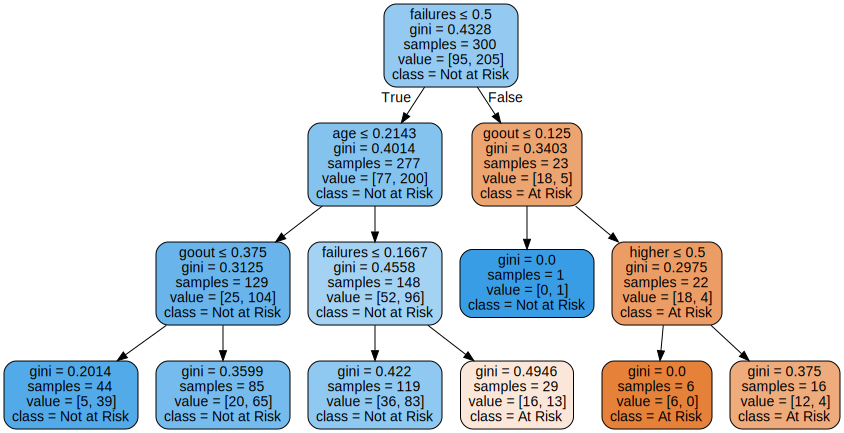

In [15]:
# Plot out the tree
from IPython.display import Image
from sklearn.externals.six import StringIO
from graphviz import Source

resNames = ['At Risk','Not at Risk']
dot_data = StringIO()

tree.export_graphviz(clf, out_file=dot_data,  
                         feature_names=fNames,
                         class_names=resNames,
                         filled=True, rounded=True,  
                         special_characters=True)  
src = Source(dot_data.getvalue())
print("Visual Representation of the Risk Identifier Model")
src

### References
For this project I made extensive use of the scikit-learn documentation and the course materials.